<a href="https://colab.research.google.com/github/chetan7116desai/TEAM_A_data606/blob/main/Data_Cleansing/2_4VARZOS_Datacleaning%26EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Vaccine Efficiency Prediction using machine learning techniques**


In [ ]:
# Connecting to shared drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings(action='ignore')
import re
import numpy as np

In [ ]:
df_vax = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_vax.csv")
df_vax.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df_symp = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_sym.csv")
df_symp.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df_data = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_pat.csv")
df_data.drop('Unnamed: 0',axis=1,inplace=True)

## Common Functions

In [ ]:
def sanitycheck(df):
    """
    Generates Unique count, Null Count and Null Percentage for each column in Dataframe
    
    Parameters
    ---------
    Input pandas dataframe
    
    Output: pandas dataframe
    """
    data = []
    for col in df.columns:
        data.append({'Column' : col,'Unique' : len(df[col].unique()),
                'Null Count' : df[col].isnull().sum(),
                'Null Percentage' : round(df[col].isnull().sum()/df.shape[0]*100,2) })
    return pd.DataFrame(data).sort_values(['Null Percentage'],ascending=False)

In [ ]:
def binaryconvert(df,cols):
    """
    Converts categorical value with Y and N to binary 0's and 1's    
    Parameters
    ---------
    Input pandas dataframe and column names
    
    Output: pandas dataframe
    """
    for col in cols:
      df[col] = np.where(df[col] == "Y", 1, 0)


In [ ]:
def regex_clean(text):
            
    # Remove special terms    
    text = re.sub(pattern='#x200B;|&lt;|&gt;|&amp;|_', repl=' ', string=str(text))  
    
    # Remove all digits
    text = re.sub(pattern=r'\d+', repl=' ', string=str(text))
    #text = re.sub(pattern=r'\w*\d\w*', repl='', string=text)
    
    # Remove non-english symbols
    text = re.sub(pattern=r'[^a-zA-Z1-9]+', repl=' ', string=str(text))
  
    return text

## Varzos Vaccine Data Exploration

### Varzos VAERS vaccine data

In [ ]:
# Filtering only COVID 19 Vaccine info
#df_varzos_vax= df_vax.query('VAX_TYPE == "varzosV" | VAX_TYPE == "varzos"')

df_varzos_vax= df_vax.query('VAX_TYPE == "VARZOS"')
print(df_varzos_vax["VAERS_ID"].nunique())

101005


In [ ]:
vaers_varzos = df_data.merge(df_varzos_vax, on='VAERS_ID',how='right').merge(df_symp, on='VAERS_ID',how='inner')


In [ ]:
print(vaers_varzos["VAERS_ID"].nunique())

101001


In [ ]:
vaers_varzos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123776 entries, 0 to 123775
Data columns (total 52 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         123776 non-null  int64  
 1   RECVDATE         123776 non-null  object 
 2   STATE            104028 non-null  object 
 3   AGE_YRS          89986 non-null   float64
 4   CAGE_YR          82945 non-null   float64
 5   CAGE_MO          168 non-null     float64
 6   SEX              123776 non-null  object 
 7   RPT_DATE         40205 non-null   object 
 8   SYMPTOM_TEXT     123773 non-null  object 
 9   DIED             437 non-null     object 
 10  DATEDIED         305 non-null     object 
 11  L_THREAT         1018 non-null    object 
 12  ER_VISIT         11923 non-null   object 
 13  HOSPITAL         5818 non-null    object 
 14  HOSPDAYS         2462 non-null    float64
 15  X_STAY           170 non-null     object 
 16  DISABLE          3585 non-null    obje

In [ ]:
#to check only the covid data
vaers_varzos.VAX_TYPE.unique()


array(['VARZOS'], dtype=object)

In [ ]:
#covid data features and observations.
vaers_varzos.shape

(123776, 52)

In [ ]:
vaers_varzos.describe()

,VAERS_ID,AGE_YRS,CAGE_YR,CAGE_MO,HOSPDAYS,NUMDAYS,FORM_VERS,SYMPTOMVERSION1,SYMPTOMVERSION2,SYMPTOMVERSION3,SYMPTOMVERSION4,SYMPTOMVERSION5
count,1.237760e+05,89986.000000,82945.000000,168.000000,2462.000000,85728.000000,123776.000000,123776.000000,96027.000000,67842.000000,47106.000000,31585.000000
mean,8.177498e+05,64.460398,64.462138,0.191667,6.995126,32.083077,1.668385,20.264769,20.293950,20.436982,20.565019,20.751027
std,3.483404e+05,10.449311,9.932264,0.258373,19.355965,492.376808,0.470795,3.644451,3.581522,3.528802,3.467244,3.371907
min,2.595890e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.100000,8.100000,8.100000,8.100000,8.100000
25%,6.129435e+05,59.000000,59.000000,0.000000,2.000000,0.000000,1.000000,18.100000,18.100000,19.100000,20.100000,21.000000
50%,7.903215e+05,64.000000,64.000000,0.100000,4.000000,1.000000,2.000000,21.100000,21.100000,21.100000,22.000000,22.000000
75%,8.674890e+05,71.000000,70.000000,0.300000,7.000000,2.000000,2.000000,23.000000,23.000000,23.000000,23.000000,23.000000
max,2.071082e+06,117.000000,117.000000,1.000000,731.000000,32547.000000,2.000000,24.100000,24.100000,24.100000,24.100000,24.100000


In [ ]:
vaers_varzos.duplicated().value_counts()


False    123675
True        101
dtype: int64

In [ ]:
# Check if duplicates have been dropped
vaers_varzos.drop_duplicates(inplace=True)
vaers_varzos.duplicated().value_counts()


False    123675
dtype: int64

In [ ]:
vaers_varzos.drop(columns=['RPT_DATE', 'ER_VISIT', 'V_FUNDBY'], inplace=True)
vaers_varzos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123675 entries, 0 to 123775
Data columns (total 49 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         123675 non-null  int64  
 1   RECVDATE         123675 non-null  object 
 2   STATE            103948 non-null  object 
 3   AGE_YRS          89931 non-null   float64
 4   CAGE_YR          82890 non-null   float64
 5   CAGE_MO          168 non-null     float64
 6   SEX              123675 non-null  object 
 7   SYMPTOM_TEXT     123672 non-null  object 
 8   DIED             436 non-null     object 
 9   DATEDIED         304 non-null     object 
 10  L_THREAT         1015 non-null    object 
 11  HOSPITAL         5812 non-null    object 
 12  HOSPDAYS         2462 non-null    float64
 13  X_STAY           170 non-null     object 
 14  DISABLE          3585 non-null    object 
 15  RECOVD           118437 non-null  object 
 16  VAX_DATE         99256 non-null   obje

In [ ]:
# Drop the version columns as we not required
vaers_varzos.drop(columns=['SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 
                 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'], inplace=True)

In [ ]:
sanitycheck(vaers_varzos)

,Column,Unique,Null Count,Null Percentage
28,BIRTH_DEFECT,2,123665,99.99
5,CAGE_MO,12,123507,99.86
13,X_STAY,2,123505,99.86
9,DATEDIED,180,123371,99.75
8,DIED,2,123239,99.65
10,L_THREAT,2,122660,99.18
12,HOSPDAYS,53,121213,98.01
14,DISABLE,2,120090,97.10
30,ER_ED_VISIT,2,118220,95.59
11,HOSPITAL,2,117863,95.30


In [ ]:
vaers_varzos = vaers_varzos.drop(columns =['VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE','RECVDATE','CAGE_YR','CAGE_MO',
                                         'CAGE_YR','CAGE_MO',
               'V_ADMINBY','FORM_VERS','LAB_DATA','TODAYS_DATE',
               'SPLTTYPE','PRIOR_VAX','OFC_VISIT'])
vaers_varzos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123675 entries, 0 to 123775
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      123675 non-null  int64  
 1   STATE         103948 non-null  object 
 2   AGE_YRS       89931 non-null   float64
 3   SEX           123675 non-null  object 
 4   SYMPTOM_TEXT  123672 non-null  object 
 5   DIED          436 non-null     object 
 6   DATEDIED      304 non-null     object 
 7   L_THREAT      1015 non-null    object 
 8   HOSPITAL      5812 non-null    object 
 9   HOSPDAYS      2462 non-null    float64
 10  X_STAY        170 non-null     object 
 11  DISABLE       3585 non-null    object 
 12  RECOVD        118437 non-null  object 
 13  VAX_DATE      99256 non-null   object 
 14  ONSET_DATE    91150 non-null   object 
 15  NUMDAYS       85665 non-null   float64
 16  OTHER_MEDS    67996 non-null   object 
 17  CUR_ILL       67260 non-null   object 
 18  HIST

In [ ]:
vaers_varzos.AGE_YRS.isna().value_counts()

False    89931
True     33744
Name: AGE_YRS, dtype: int64

In [ ]:
# Drop all rows that have missing values
vaers_varzos = vaers_varzos.dropna(subset = ['AGE_YRS'])

In [ ]:
vaers_varzos[vaers_varzos['SYMPTOM_TEXT'].isnull()].head()

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,...,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
32314,640334,AZ,16.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Drug administered to patient of inappropriate age,Inappropriate schedule of drug administration,NaN,NaN,NaN
106412,1217689,GA,28.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,ZOSTER (SHINGRIX),Unevaluable event,NaN,NaN,NaN,NaN
108209,1361770,TN,54.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NKDA,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,ZOSTER (SHINGRIX),Unevaluable event,NaN,NaN,NaN,NaN


In [ ]:
vaers_varzos = vaers_varzos.dropna(subset = ['SYMPTOM_TEXT'])


In [ ]:
#Converting the Date Columns to Date Datatype
vaers_varzos['DATEDIED'] =  pd.to_datetime(vaers_varzos['DATEDIED'])
vaers_varzos['VAX_DATE'] =  pd.to_datetime(vaers_varzos['VAX_DATE'])
vaers_varzos['ONSET_DATE'] =  pd.to_datetime(vaers_varzos['ONSET_DATE'])

In [ ]:
# Converting SEX columns to binary
vaers_varzos['SEX'] = vaers_varzos['SEX'].replace('U', '2')
vaers_varzos['SEX'] = vaers_varzos['SEX'].replace('F', '0')
vaers_varzos['SEX'] = vaers_varzos['SEX'].replace('M', '1')

vaers_varzos['RECOVD'] = vaers_varzos['RECOVD'].fillna(2)
vaers_varzos['RECOVD'] = vaers_varzos['RECOVD'].replace('U', 2)
vaers_varzos['RECOVD'] = vaers_varzos['RECOVD'].replace('N', 0)
vaers_varzos['RECOVD'] = vaers_varzos['RECOVD'].replace('Y', 1)

vaers_varzos['HOSPDAYS'] = vaers_varzos['HOSPDAYS'].fillna(0)
vaers_varzos.STATE = vaers_varzos.STATE.str.upper()

In [ ]:
cols =  ['L_THREAT','DIED','HOSPITAL','DISABLE','BIRTH_DEFECT','X_STAY','ER_ED_VISIT']
binaryconvert(vaers_varzos,cols)

In [ ]:
vaers_varzos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89928 entries, 0 to 123775
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   VAERS_ID      89928 non-null  int64         
 1   STATE         83103 non-null  object        
 2   AGE_YRS       89928 non-null  float64       
 3   SEX           89928 non-null  object        
 4   SYMPTOM_TEXT  89928 non-null  object        
 5   DIED          89928 non-null  int64         
 6   DATEDIED      226 non-null    datetime64[ns]
 7   L_THREAT      89928 non-null  int64         
 8   HOSPITAL      89928 non-null  int64         
 9   HOSPDAYS      89928 non-null  float64       
 10  X_STAY        89928 non-null  int64         
 11  DISABLE       89928 non-null  int64         
 12  RECOVD        89928 non-null  int64         
 13  VAX_DATE      86794 non-null  datetime64[ns]
 14  ONSET_DATE    81581 non-null  datetime64[ns]
 15  NUMDAYS       78288 non-null  float

In [ ]:
vaers_varzos['SYMPTOM_TEXT'] = vaers_varzos['SYMPTOM_TEXT'].apply(regex_clean)
vaers_varzos['OTHER_MEDS'] = vaers_varzos['OTHER_MEDS'].apply(regex_clean)
vaers_varzos['HISTORY'] = vaers_varzos['HISTORY'].apply(regex_clean)
vaers_varzos['ALLERGIES'] = vaers_varzos['ALLERGIES'].apply(regex_clean)
vaers_varzos[['SYMPTOM_TEXT', 'OTHER_MEDS', 'HISTORY', 'ALLERGIES']].head()

,SYMPTOM_TEXT,OTHER_MEDS,HISTORY,ALLERGIES
0,Information has been received from a pharmacis...,NONE,Medical history Shingles,nan
1,Information has been received from a year old ...,HYTRIN testosterone,nan,nan
2,Information has been received from a year old ...,PROSCAR SYNTHROID PRAVACHOL BENEMID,Medical history Shingles,nan
3,Information has been received from a year old ...,Zetia,Hypercholesterolaemia Joint disorder,nan
4,Received Zostavax developed rash along left T ...,HCTZ ASA Proscar Lorazepam Fosamax Calcium vit...,Spinal Stenosis Osteoporosis Hypertension BPH ...,nan


In [ ]:
# Remove null values from vax_date and onset_date
vaers_varzos = vaers_varzos[vaers_varzos['VAX_DATE'].notna()]
vaers_varzos = vaers_varzos[vaers_varzos['ONSET_DATE'].notna()]

# Calculate 'num_days'
vaers_varzos['NUMDAYS'] = (vaers_varzos['ONSET_DATE'] - vaers_varzos['VAX_DATE']).dt.days

In [ ]:
# Interval between vaccination date and onset date should be positive, otherwise AE occured prior to vaccination
vaers_varzos = vaers_varzos[vaers_varzos['NUMDAYS'] >= 0]
vaers_varzos['NUMDAYS'] = vaers_varzos['NUMDAYS'].astype(int)

In [ ]:
vaers_varzos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78288 entries, 0 to 123775
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   VAERS_ID      78288 non-null  int64         
 1   STATE         73419 non-null  object        
 2   AGE_YRS       78288 non-null  float64       
 3   SEX           78288 non-null  object        
 4   SYMPTOM_TEXT  78288 non-null  object        
 5   DIED          78288 non-null  int64         
 6   DATEDIED      176 non-null    datetime64[ns]
 7   L_THREAT      78288 non-null  int64         
 8   HOSPITAL      78288 non-null  int64         
 9   HOSPDAYS      78288 non-null  float64       
 10  X_STAY        78288 non-null  int64         
 11  DISABLE       78288 non-null  int64         
 12  RECOVD        78288 non-null  int64         
 13  VAX_DATE      78288 non-null  datetime64[ns]
 14  ONSET_DATE    78288 non-null  datetime64[ns]
 15  NUMDAYS       78288 non-null  int64

In [ ]:
serious = vaers_varzos[['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']].copy()

In [ ]:
def serious_criteria(row):
    row['serious'] = 0
    for col in ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']:
        if row[col] == 1:
            row['serious'] = 1
            
    return row

#     if row['died'] == 'Y' or row['l_threat'] == 'Y' or row['hospital'] == 'Y' or row['x_stay'] == 'Y' or row['disable'] == 'Y' or row['birth_defect'] == 'Y':
#         return 1
#     else:
#         return 0


vaers_varzos = vaers_varzos.apply(serious_criteria, axis=1)


In [ ]:
vaers_varzos['serious'].value_counts()

0    73824
1     4464
Name: serious, dtype: int64

In [ ]:
import pandas as pd

fields = ['MedDRA Code', 'PT Name','SOC Name']

meDRA = pd.read_excel('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/meddra-important-medical-event-terms-list-version-250_en.xlsx', usecols=fields)

In [ ]:
meDRA.head()

,MedDRA Code,PT Name,SOC Name
0,10086470,Erythroid dysplasia,Blood and lymphatic system disorders
1,10087400,Paraneoplastic eosinophilia,Blood and lymphatic system disorders
2,10086663,Sarcoidosis of lymph node,Blood and lymphatic system disorders
3,10087091,Warm autoimmune haemolytic anaemia,Blood and lymphatic system disorders
4,10087237,Atrial standstill,Cardiac disorders


In [ ]:
list_of_names = meDRA['PT Name'].to_list()
list_of_names = [i.lower() for i in list_of_names]
print('List of Names: ', list_of_names)
print('Type of listOfNames: ', type(list_of_names))

List of Names:  ['erythroid dysplasia', 'paraneoplastic eosinophilia', 'sarcoidosis of lymph node', 'warm autoimmune haemolytic anaemia', 'atrial standstill', 'chronic myocarditis', 'fascicular block', 'myopericarditis', 'pacing induced cardiomyopathy', 'aphallia', 'arhinencephaly', 'congenital female genital tract fistula', 'congenital female reproductive tract disorder', 'congenital musculoskeletal disorder', 'congenital musculoskeletal disorder of head and neck', 'congenital musculoskeletal disorder of limbs', 'congenital musculoskeletal disorder of skull', 'congenital musculoskeletal disorder of spine', 'congenital musculoskeletal disorder of trunk', 'congenital parvovirus b19 infection', 'congenital subglottic stenosis', 'congenital vena cava stenosis', 'congenital viral infection', 'congenital vocal cord paralysis', 'osteochondrodysplasia', 'torch infection', 'central hypothyroidism', 'acquired hypertrophy of the retinal pigment epithelium', 'central serous chorioretinopathy', 'i

In [ ]:
%%time
# Define a funtion that checks each row of the dataframe and see if symptom 1-5 is in the ime list
def ime(row):
    
    row['ime'] = 0
    
    for col in ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']:
        
        if str(row[col]).lower() in list_of_names:
            
            row['ime'] = 1
    
    return row

# apply the function to the dataframe and check the relevant columns
vaers_varzos = vaers_varzos.apply(ime, axis=1)
# df[['symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'ime']]

CPU times: user 1min 55s, sys: 863 ms, total: 1min 56s
Wall time: 2min 2s


In [ ]:
vaers_varzos['ime'].value_counts()

0    73448
1     4840
Name: ime, dtype: int64

In [ ]:
vaers_varzos['serious'] = vaers_varzos['serious'] + vaers_varzos['ime']
vaers_varzos['serious'] = vaers_varzos['serious'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
vaers_varzos['serious'].value_counts()

0    70469
1     7819
Name: serious, dtype: int64

In [ ]:
vaers_varzos.to_csv('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/var_clean.csv', index=False)

### EDA

In [ ]:
vaers_var = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/var_clean.csv")

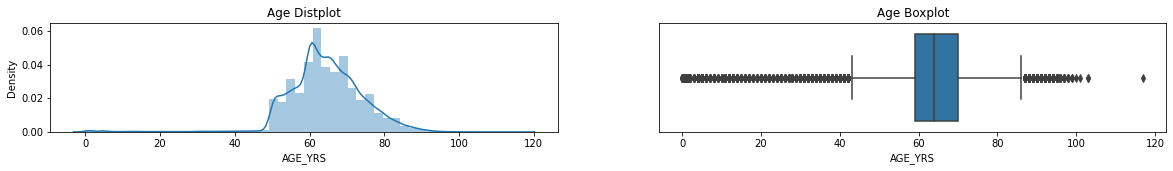

In [ ]:
from scipy.stats import probplot,skew
fig, axes = plt.subplots(1, 2, figsize=(20,2))
sns.distplot(vaers_var['AGE_YRS'],kde=True, ax=axes[0])
sns.boxplot(vaers_var['AGE_YRS'], ax=axes[1])
axes[1].set_yticklabels([])
axes[1].set_yticks([])
axes[0].set_title('Age Distplot')
axes[1].set_title('Age Boxplot')
plt.show()

In [ ]:
vaers_var[vaers_var['AGE_YRS'] <18]

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,...,VAX_TYPE,VAX_MANU,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,serious,ime
16,262883,OH,1.23,1,This is in follow up to report s previous subm...,0,NaN,0,0,0.0,...,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Incorrect dose administered,Medication error,Rash erythematous,Wrong drug administered,NaN,0,0
90,268867,OR,4.00,0,Administered Zostavax for varicella on site of...,0,NaN,0,0,0.0,...,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Headache,Injection site erythema,Injection site oedema,Pyrexia,Viral infection,0,0
91,268868,OR,1.01,0,Mis administered Zostavax for varicella on ale...,0,NaN,0,0,0.0,...,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Abnormal behaviour,Body temperature increased,Decreased appetite,Headache,Insomnia,0,0
92,268868,OR,1.01,0,Mis administered Zostavax for varicella on ale...,0,NaN,0,0,0.0,...,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Pyrexia,Wrong drug administered,NaN,NaN,NaN,0,0
93,268869,PA,4.00,0,Mis administered Zostavax for Varicella Alerte...,0,NaN,0,0,0.0,...,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Headache,Vomiting,Wrong drug administered,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77353,742563,FR,0.08,0,Initial information regarding this unsolicited...,0,NaN,0,0,0.0,...,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,ZOSTER (SHINGRIX),Hypotonic-hyporesponsive episode,Pallor,Somnolence,Tremor,NaN,0,0
77499,784822,FR,2.00,1,This spontaneous report was received from a ph...,0,NaN,0,0,0.0,...,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Incorrect route of product administration,No adverse event,Wrong product administered,NaN,NaN,0,0
77596,812094,FR,1.67,0,Fluid intake reduced Decreased appetite Red sp...,0,NaN,0,0,0.0,...,VARZOS,UNKNOWN MANUFACTURER,ZOSTER (NO BRAND NAME),Decreased appetite,Diarrhoea,Fluid intake reduced,Injection site erythema,Rash papular,0,0
77952,883451,FR,5.00,0,Acute deafness loud tinnitus vertigo near drop...,0,NaN,0,0,0.0,...,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Sudden hearing loss,Tinnitus,Vertigo,NaN,NaN,1,1


In [ ]:
vaers_var[vaers_var['AGE_YRS'] >90]

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,...,VAX_TYPE,VAX_MANU,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,serious,ime
264,273515,TN,91.0,0,Information has been received from a pharmacis...,0,NaN,0,0,0.0,...,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Back pain,Herpes zoster,Pain,NaN,NaN,1,0
752,283668,CA,91.0,0,DEVELOPED SHINGLES DAYS AFTER IMMUNIZATION,0,NaN,0,0,0.0,...,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Herpes zoster,NaN,NaN,NaN,NaN,0,0
977,291478,MN,91.0,0,Information has been received from a consumer ...,0,NaN,0,1,2.0,...,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Herpes zoster,Laboratory test,Malaise,NaN,NaN,1,0
1039,293168,NJ,91.0,0,Rec d shingles shot Shingles pain started on f...,0,NaN,0,0,0.0,...,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Herpes zoster,Muscular weakness,Pain,Pruritus,Rash,0,0
1267,295317,KS,96.0,0,Information has been received from a pharmacis...,0,NaN,0,0,0.0,...,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Blister,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76985,574779,FR,91.0,0,Information has been received from SPMSD manuf...,0,NaN,0,0,0.0,...,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Arthralgia,Arthritis reactive,Polymyalgia rheumatica,Pyrexia,Swelling,1,1
76986,574779,FR,91.0,0,Information has been received from SPMSD manuf...,0,NaN,0,0,0.0,...,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Ultrasound scan abnormal,X-ray normal,NaN,NaN,NaN,0,0
77433,759403,FR,91.0,2,This case was reported by a physician via sale...,0,NaN,0,0,0.0,...,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,ZOSTER (SHINGRIX),Fall,Fatigue,Spinal fracture,NaN,NaN,1,1
77498,784818,FR,95.0,1,This case was reported by a consumer via call ...,0,NaN,0,0,0.0,...,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,ZOSTER (SHINGRIX),Facial paralysis,Herpes zoster,Mouth ulceration,Scratch,Stomatitis,1,1


In [ ]:
vaers_var.drop(vaers_var[(vaers_var['SYMPTOM1'] == 'SARS-CoV-2 test negative')|
           (vaers_var['SYMPTOM2'] == 'SARS-CoV-2 test negative')| 
           (vaers_var['SYMPTOM3'] == 'SARS-CoV-2 test negative')| 
           (vaers_var['SYMPTOM4'] == 'SARS-CoV-2 test negative')| 
           (vaers_var['SYMPTOM5'] == 'SARS-CoV-2 test negative')].index, inplace=True)

In [ ]:
vaers_var.drop(vaers_var[(vaers_var['SYMPTOM1'] == 'Bacterial test negative')|
           (vaers_var['SYMPTOM2'] == 'Bacterial test negative')| 
           (vaers_var['SYMPTOM3'] == 'Bacterial test negative')| 
           (vaers_var['SYMPTOM4'] == 'Bacterial test negative')| 
           (vaers_var['SYMPTOM5'] == 'Bacterial test negative')].index, inplace=True)



In [ ]:

vaers_var.drop(vaers_var[(vaers_var['SYMPTOM1'] == 'Wrong drug administered')|
           (vaers_var['SYMPTOM2'] == 'Wrong drug administered')| 
           (vaers_var['SYMPTOM3'] == 'Wrong drug administered')| 
           (vaers_var['SYMPTOM4'] == 'Wrong drug administered')| 
           (vaers_var['SYMPTOM5'] == 'Wrong drug administered')].index, inplace=True)

In [ ]:
vaers_var.drop(vaers_var[(vaers_var['SYMPTOM1'] == 'Inappropriate schedule of product administration')|
           (vaers_var['SYMPTOM2'] == 'Inappropriate schedule of product administration')| 
           (vaers_var['SYMPTOM3'] == 'Inappropriate schedule of product administration')| 
           (vaers_var['SYMPTOM4'] == 'Inappropriate schedule of product administration')| 
           (vaers_var['SYMPTOM5'] == 'Inappropriate schedule of product administration')].index, inplace=True)

In [ ]:
vaers_var.drop(vaers_var[(vaers_var['SYMPTOM1'] == 'Unevaluable event')|
           (vaers_var['SYMPTOM2'] == 'Unevaluable event')| 
           (vaers_var['SYMPTOM3'] == 'Unevaluable event')| 
           (vaers_var['SYMPTOM4'] == 'Unevaluable event')| 
           (vaers_var['SYMPTOM5'] == 'Unevaluable event')].index, inplace=True)

In [ ]:
vaers_var.drop(vaers_var[(vaers_var['SYMPTOM1'] == 'No adverse event')|
           (vaers_var['SYMPTOM2'] == 'No adverse event')| 
           (vaers_var['SYMPTOM3'] == 'No adverse event')| 
           (vaers_var['SYMPTOM4'] == 'No adverse event')| 
           (vaers_var['SYMPTOM5'] == 'No adverse event')].index, inplace=True)

In [ ]:
vaers_var.drop(vaers_var[(vaers_var['SYMPTOM1'] == 'Product storage error')|
           (vaers_var['SYMPTOM2'] == 'Product storage error')| 
           (vaers_var['SYMPTOM3'] == 'Product storage error')| 
           (vaers_var['SYMPTOM4'] == 'Product storage error')| 
           (vaers_var['SYMPTOM5'] == 'Product storage error')].index, inplace=True)

In [ ]:
df = vaers_var

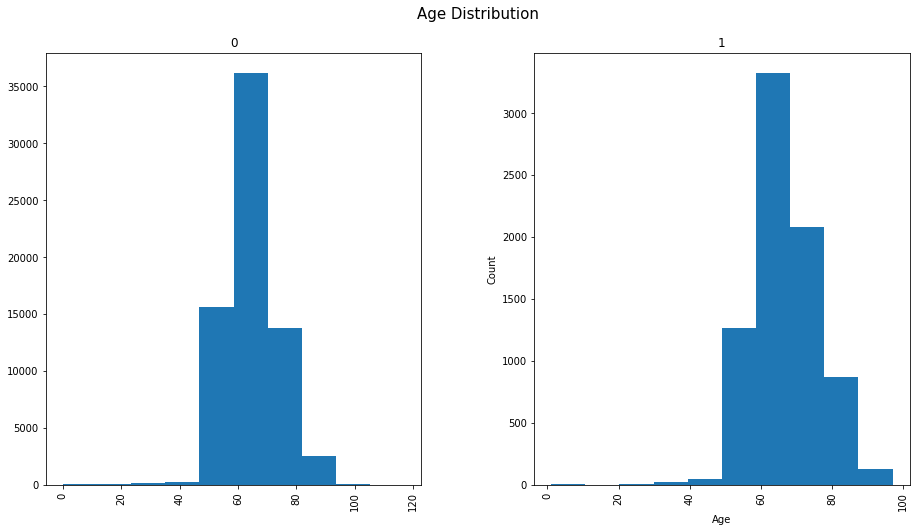

In [ ]:
# Distribution of adverse event severity based on age
df['AGE_YRS'].hist(by=df['serious'], figsize=(15,8))
plt.xlabel('Age')
plt.ylabel('Count')
plt.suptitle('Age Distribution', fontsize=15);


In [ ]:
import plotly.express as px

print(px.colors.qualitative.Vivid)

['rgb(229, 134, 6)', 'rgb(93, 105, 177)', 'rgb(82, 188, 163)', 'rgb(153, 201, 69)', 'rgb(204, 97, 176)', 'rgb(36, 121, 108)', 'rgb(218, 165, 27)', 'rgb(47, 138, 196)', 'rgb(118, 78, 159)', 'rgb(237, 100, 90)', 'rgb(165, 170, 153)']


In [ ]:

plt.figure(figsize=(15,8))
labels = df['VAX_MANU'].value_counts().index
values = df['VAX_MANU'].value_counts().values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,marker_colors = [
                      'rgb(229, 134, 6)', 'rgb(93, 105, 177)', 'rgb(82, 188, 163)'])])
fig.show()

<Figure size 1080x576 with 0 Axes>

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = df['VAX_MANU'].value_counts().index
values1 = df[df['serious'] == 1].VAX_MANU.value_counts().values
values2 = df[df['serious'] == 0].VAX_MANU.value_counts().values
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values= values1, name="Serious case",marker_colors = [ 'rgb(229, 134, 6)', 'rgb(93, 105, 177)', 'rgb(82, 188, 163)']),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="Non Serious case",marker_colors = [ 'rgb(229, 134, 6)', 'rgb(93, 105, 177)', 'rgb(82, 188, 163)']),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Seriousness of Vaccine Manufacturer",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Serious', x=0.18, y=0.5, font_size=10, showarrow=False),
                 dict(text='Non Serious', x=0.82, y=0.5, font_size=10, showarrow=False)])
fig.show()

In [ ]:
## As unknown manufacturer are negligible 
df = df[~df['VAX_MANU'].isin(['UNKNOWN MANUFACTURER'])]  

([<matplotlib.axis.XTick at 0x7f0a630bcb10>,
 [Text(0, 0, 'Female'), Text(0, 0, 'Male'), Text(0, 0, 'Unknown')])

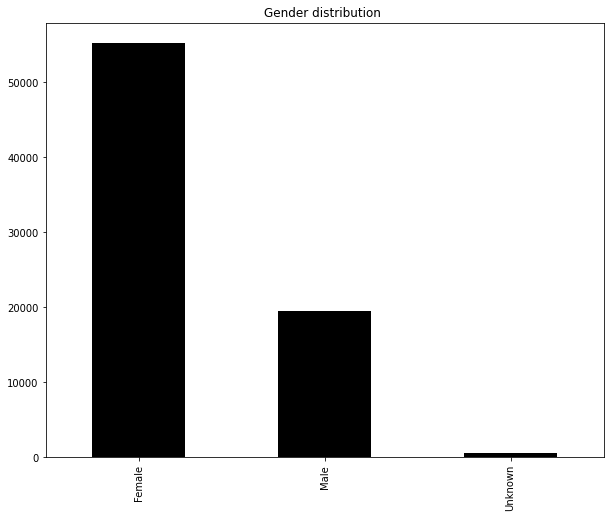

In [ ]:
plt.figure(figsize=(10,8))
route = df['SEX'].value_counts()
route.plot(kind='bar', title='Gender distribution ',color="black")
values = ['Female', 'Male', 'Unknown'] 
plt.xticks(route.index,values)

In [ ]:
gender_serious = (df.groupby(['SEX', 'serious']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count'))

In [ ]:
map_dict = {1: "Male", 0 : "Female", 2 :"Unknown"}
map_dict_s = {1: "Serious", 0 : "Non Serious"}
gender_serious["SEX"] = gender_serious["SEX"].map(map_dict)
gender_serious["serious"] = gender_serious["serious"].map(map_dict_s)

In [ ]:
import plotly.express as px


fig = px.bar(gender_serious, x="SEX", y="count", color="serious", title="Gender seriousness comparison",text_auto=True,
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    template="plotly",
    xaxis=dict(title_text="Gender"),
    yaxis=dict(title_text="count")
)
fig.show()

In [ ]:
# drop all rows with unkown SEX
df = df[df['SEX'] != 2]

In [ ]:
age_serious = df[['AGE_YRS', 'serious']]
map_dict_s = {1: "Serious", 0 : "Non Serious"}

age_serious["serious"] = age_serious["serious"].map(map_dict_s)


In [ ]:
bins = [10, 20, 30, 40, 50, 60,70,80,90,120]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','>90']
categories = pd.cut(age_serious['AGE_YRS'], bins, labels=group)

age_serious['category'] = categories

In [ ]:
age_serious_group = (age_serious.groupby(['category', 'serious']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count'))

In [ ]:
fig = px.bar(age_serious_group, x="category", y="count", color="serious", text_auto=True,color_discrete_sequence=px.colors.qualitative.Vivid,
             title="Age Category and seriousness comparison")
fig.update_layout(
    template="plotly",
    xaxis=dict(title_text="Age Category"),
    yaxis=dict(title_text="Count")
)
fig.show()

In [ ]:
age_serious_sex = df[['AGE_YRS','SEX', 'serious']]
map_dict_s = {1: "Serious", 0 : "Non Serious"}
map_dict = {1: "Male", 0 : "Female"}
age_serious_sex["serious"] = age_serious_sex["serious"].map(map_dict_s)
age_serious_sex["SEX"] = age_serious_sex["SEX"].map(map_dict)

bins = [10, 20, 30, 40, 50, 60,70,80,90,120]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','>90']
categories = pd.cut(age_serious_sex['AGE_YRS'], bins, labels=group)

age_serious_sex['category'] = categories

In [ ]:
age_serious_sex1 = (age_serious_sex.groupby(['category','SEX', 'serious']).size()  
   .reset_index(name='count'))

In [ ]:
#https://medium.com/@moritzkoerber/how-to-plot-a-grouped-stacked-bar-chart-in-plotly-df1685b83460
fig = go.Figure()

fig.update_layout(
    template="plotly",
    xaxis=dict(title_text="Age category and Gender"),
    yaxis=dict(title_text="count"),
    title="Age Category Vs Gender",
    barmode="stack",
)

colors = ['rgb(229, 134, 6)', 'rgb(93, 105, 177)']
for r, c in zip(age_serious_sex1.serious.unique(), colors):
    plot_df = age_serious_sex1[age_serious_sex1.serious == r]
    fig.add_trace(
        go.Bar(x=[plot_df.category, plot_df.SEX], y=plot_df['count'], name=r, marker_color=c),
    )

fig

In [ ]:
subset_df = df[['AGE_YRS','SEX','DIED','VAX_MANU']]
map_dict_d = {1: "Death", 0 : "No Death"}
map_dict = {1: "Male", 0 : "Female"}
subset_df["SEX"] = subset_df["SEX"].map(map_dict)
subset_df["DIED"] = subset_df["DIED"].map(map_dict_d)

bins = [10, 20, 30, 40, 50, 60,70,80,90,120]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','>90']
categories = pd.cut(subset_df['AGE_YRS'], bins, labels=group)

subset_df['category'] = categories
subset_df

,AGE_YRS,SEX,DIED,VAX_MANU,category
0,62.0,Female,No Death,MERCK & CO. INC.,61-70
1,67.0,Male,No Death,MERCK & CO. INC.,61-70
2,75.0,Male,No Death,MERCK & CO. INC.,71-80
3,71.0,Male,No Death,MERCK & CO. INC.,71-80
4,82.0,Male,No Death,MERCK & CO. INC.,81-90
...,...,...,...,...,...
78283,71.0,Female,No Death,GLAXOSMITHKLINE BIOLOGICALS,71-80
78284,74.0,Male,No Death,GLAXOSMITHKLINE BIOLOGICALS,71-80
78285,74.0,Male,No Death,GLAXOSMITHKLINE BIOLOGICALS,71-80
78286,70.0,Male,No Death,MERCK & CO. INC.,61-70


In [ ]:
subset_df1 = (subset_df.groupby(['category','SEX', 'DIED']).size()  
   .reset_index(name='count'))

In [ ]:
#https://medium.com/@moritzkoerber/how-to-plot-a-grouped-stacked-bar-chart-in-plotly-df1685b83460
fig = go.Figure()

fig.update_layout(
    template="plotly",
    xaxis=dict(title_text="Age category and Gender"),
    yaxis=dict(title_text="count"),
    title="Age Category Vs Gender Vs Death/No Death",
    barmode="stack",
)

colors = ['rgb(229, 134, 6)', 'rgb(93, 105, 177)']
for r, c in zip(subset_df1.DIED.unique(), colors):
    plot_df = subset_df1[subset_df1.DIED == r]
    fig.add_trace(
        go.Bar(x=[plot_df.category, plot_df.SEX], y=plot_df['count'], name=r, marker_color=c),
    )

fig

In [ ]:
sub = subset_df[(subset_df["DIED"] == 'Death')]

In [ ]:
sub = (sub.groupby(['DIED','VAX_MANU']).size()  
   .reset_index(name='count'))

In [ ]:
sub1 =(df.groupby(['VAX_MANU']).size()  
   .reset_index(name='count'))

In [ ]:
sub1 = sub1.rename(columns={"count":"totalcount"})

In [ ]:
sub1= sub1.merge(sub, on = 'VAX_MANU')
sub1.drop('DIED',axis=1,inplace=True)

In [ ]:
 sub1['Percentage'] = sub1['count'].div(sub1['totalcount']).round(4)*100

In [ ]:
sub1

,VAX_MANU,totalcount,count,Percentage
0,GLAXOSMITHKLINE BIOLOGICALS,49758,72,0.14
1,MERCK & CO. INC.,24912,99,0.40


In [ ]:
subset_death = df[(df["DIED"] == 1)]

In [ ]:
subset_death = subset_death[['VAERS_ID','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']]

In [ ]:
subset_death['Symptoms'] = subset_death[['SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']].apply(lambda x: ','.join(x.dropna()), axis=1)
#df_symp['Symptoms'] = df_symp['SYMPTOM1'] + "," +  df_symp['SYMPTOM2'] + "," +  df_symp['SYMPTOM3'] + "," +  df_symp['SYMPTOM4'] + "," +  df_symp['SYMPTOM5']
#https://stackoverflow.com/questions/45787782/combine-multiple-columns-in-pandas-excluding-nans

In [ ]:
subset_death

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,Symptoms
442,277477,Anoxic encephalopathy,Blood glucose increased,Carpal tunnel syndrome,Encephalitis,Endotracheal intubation,"Anoxic encephalopathy,Blood glucose increased,..."
443,277477,Inguinal hernia,Monocyte count decreased,Neutrophil count increased,NaN,NaN,"Inguinal hernia,Monocyte count decreased,Neutr..."
474,278688,Death,Myocardial infarction,NaN,NaN,NaN,"Death,Myocardial infarction"
840,286402,Chills,Death,Feeling cold,Pain,NaN,"Chills,Death,Feeling cold,Pain"
849,286834,Aortic rupture,Death,Myocardial infarction,NaN,NaN,"Aortic rupture,Death,Myocardial infarction"
...,...,...,...,...,...,...,...
77929,881375,Abdominal pain,Cardiac arrest,Contraindication to vaccination,Death,Intensive care,"Abdominal pain,Cardiac arrest,Contraindication..."
77930,881375,Metastatic malignant melanoma,Pancreatitis,Rash,Resuscitation,NaN,"Metastatic malignant melanoma,Pancreatitis,Ras..."
77953,883531,Death,Fall,Resuscitation,NaN,NaN,"Death,Fall,Resuscitation"
77986,894022,Death,NaN,NaN,NaN,NaN,Death


In [ ]:
subset_death = subset_death.groupby(['VAERS_ID','Symptoms']).size().reset_index().rename(columns={0:'count'})
df_covid_all_sym = subset_death.groupby('VAERS_ID')['Symptoms'].apply(','.join).reset_index()
df_covid_sym_id = df_covid_all_sym.assign(Symptoms=df_covid_all_sym.Symptoms.str.split(','))
df_covid_sym1 = df_covid_sym_id.explode('Symptoms')

In [ ]:
df_covid_sym1

,VAERS_ID,Symptoms
0,277477,Anoxic encephalopathy
0,277477,Blood glucose increased
0,277477,Carpal tunnel syndrome
0,277477,Encephalitis
0,277477,Endotracheal intubation
...,...,...
103,1993605,Myocardial infarction
104,2031919,Asthenia
104,2031919,Chills
104,2031919,Death


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

(-0.5, 1919.5, 1079.5, -0.5)

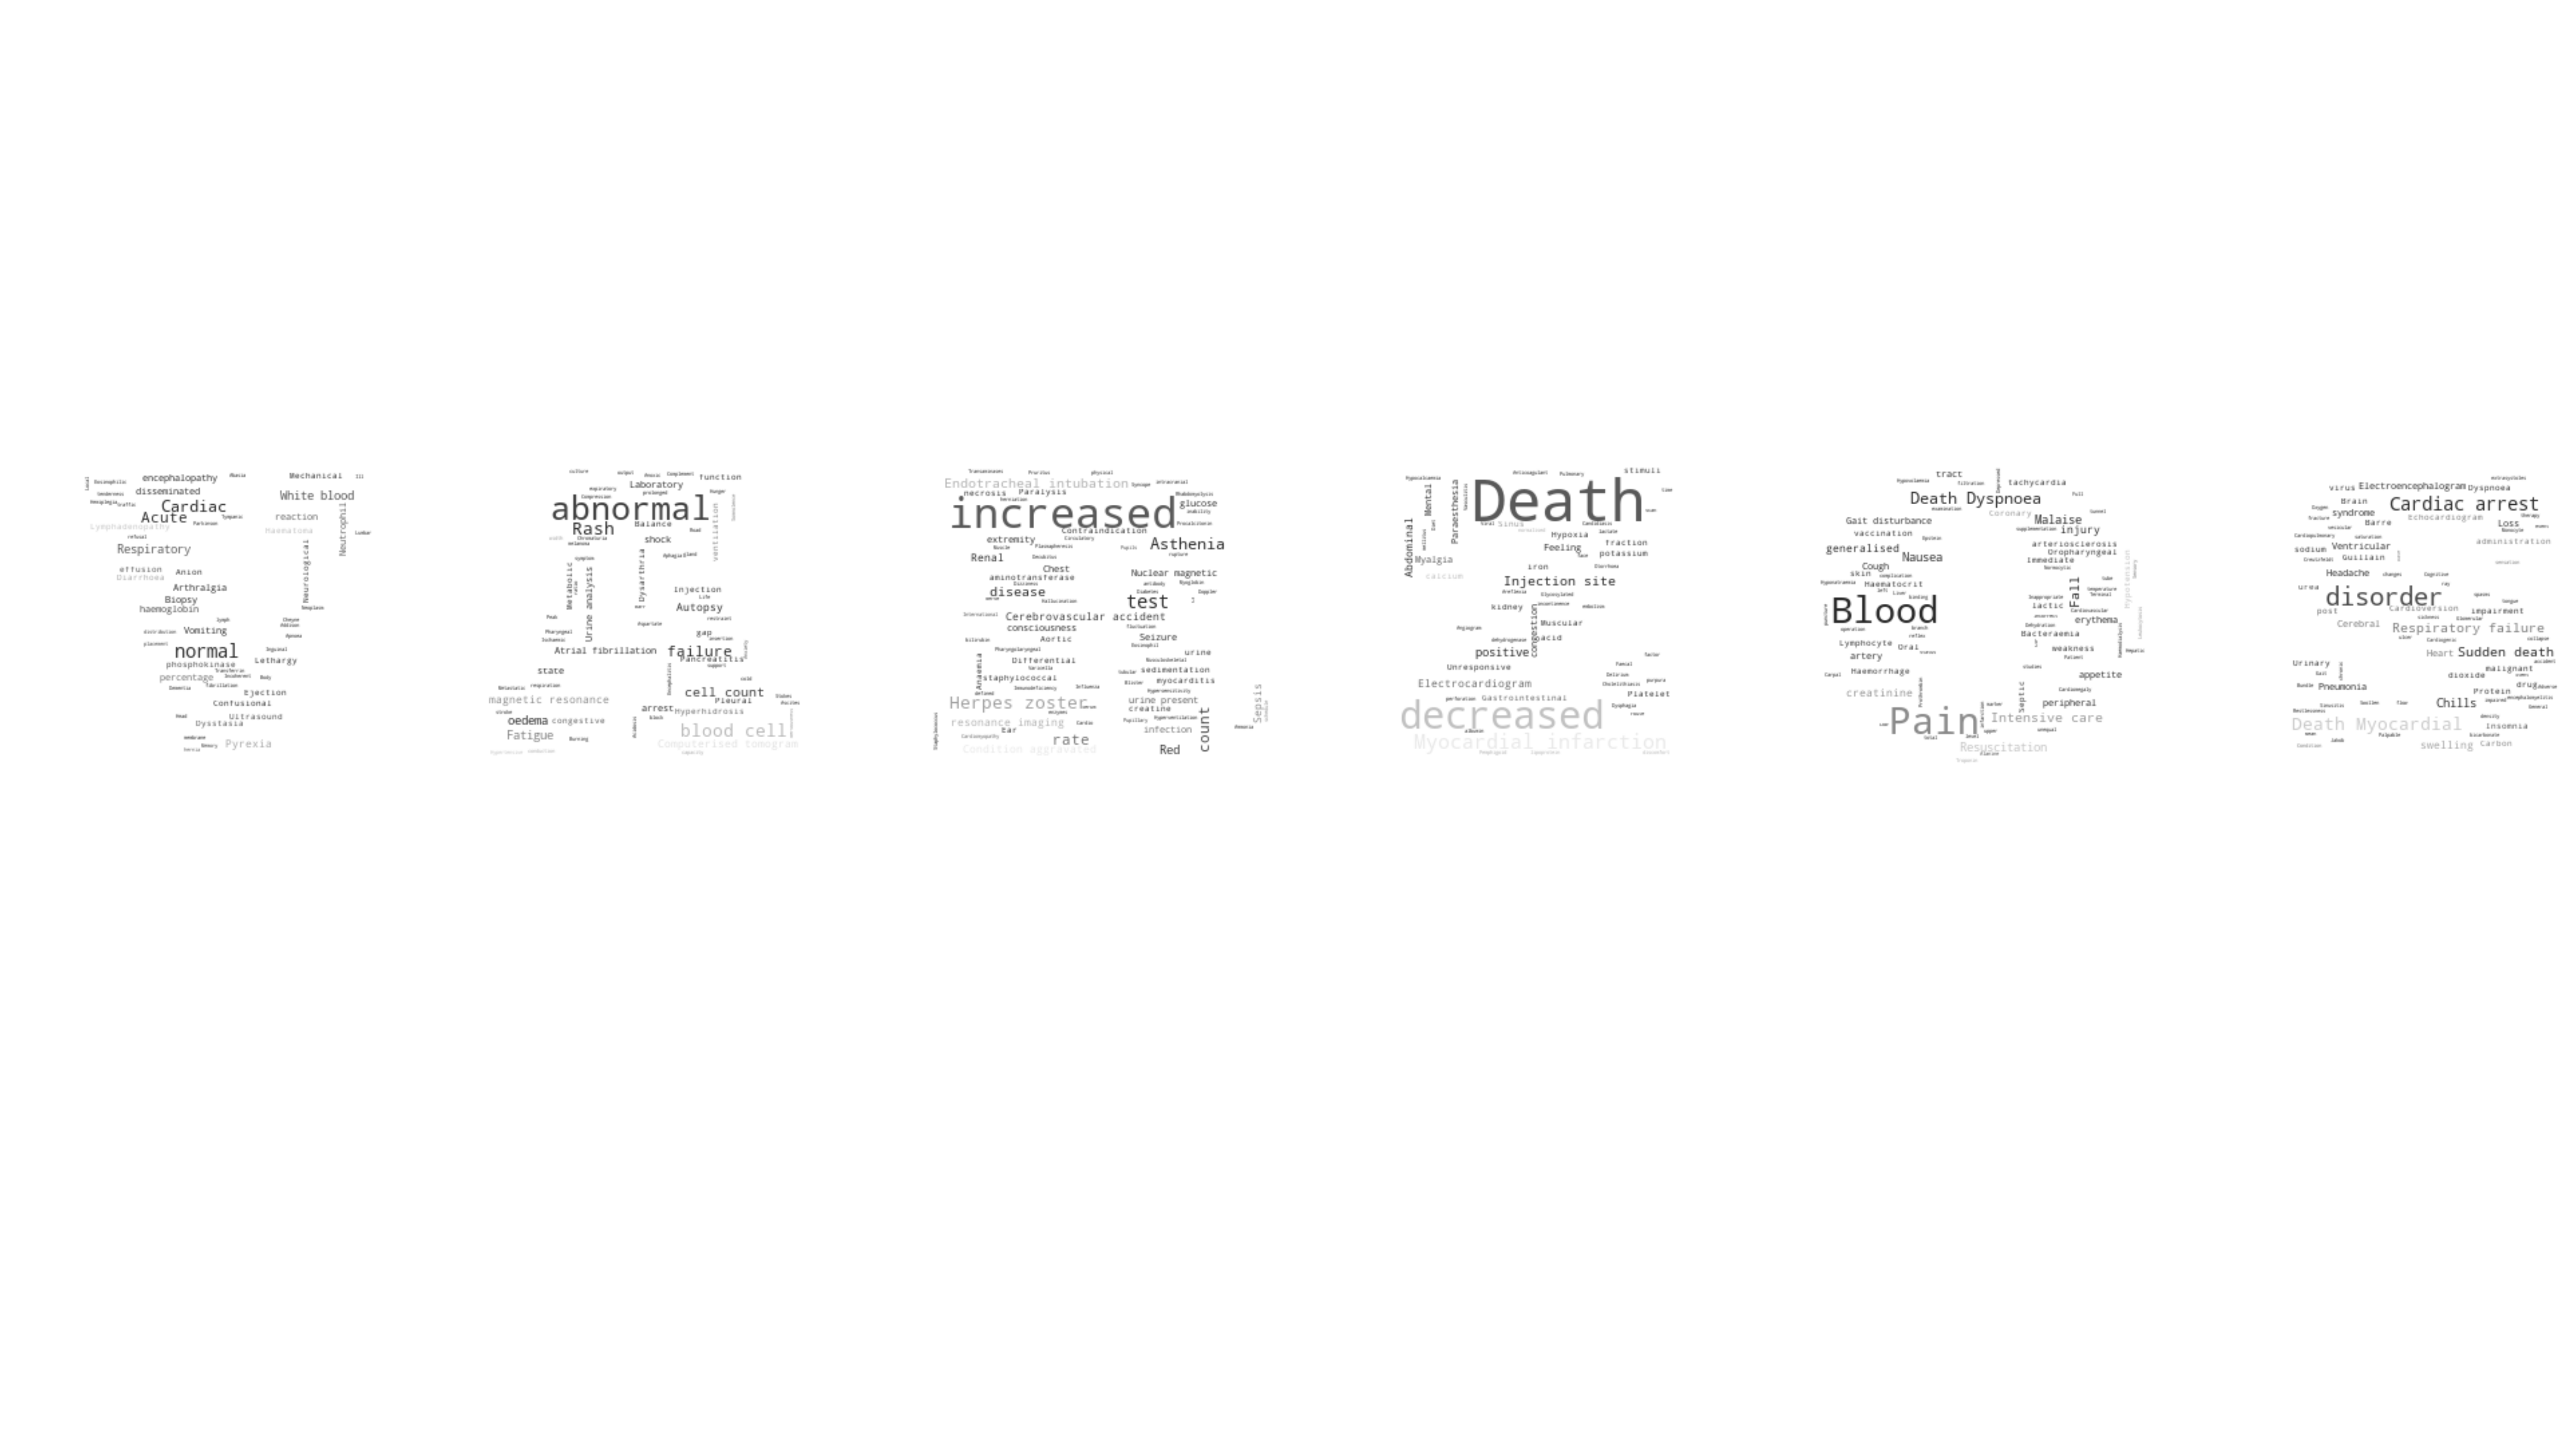

In [ ]:

# Generate a word cloud image
stopwords = set(STOPWORDS)
mask = np.array(Image.open("/content/drive/Shareddrives/Team A 606 Capstone Project/My project (5).png"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(' '.join(df_covid_all_sym.Symptoms))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[100,100])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

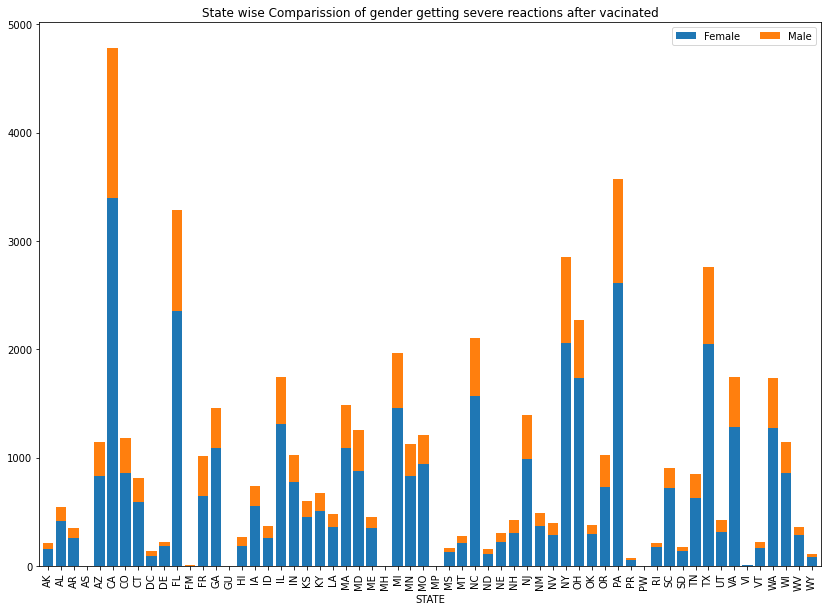

In [ ]:
StateAnalysis = df[['VAERS_ID','STATE','VAX_MANU','SEX','AGE_YRS','DIED','RECOVD','serious']].drop_duplicates()
StateAnalysis = StateAnalysis[StateAnalysis['STATE'] != '']
pd.crosstab(StateAnalysis.STATE,StateAnalysis.SEX).plot.bar(stacked=True,width = .8,figsize=(14, 10))
plt.legend(['Female', 'Male'], loc='upper right', ncol = 3)
plt.title('State wise Comparission of gender getting severe reactions after vacinated', loc ='center')
plt.show()

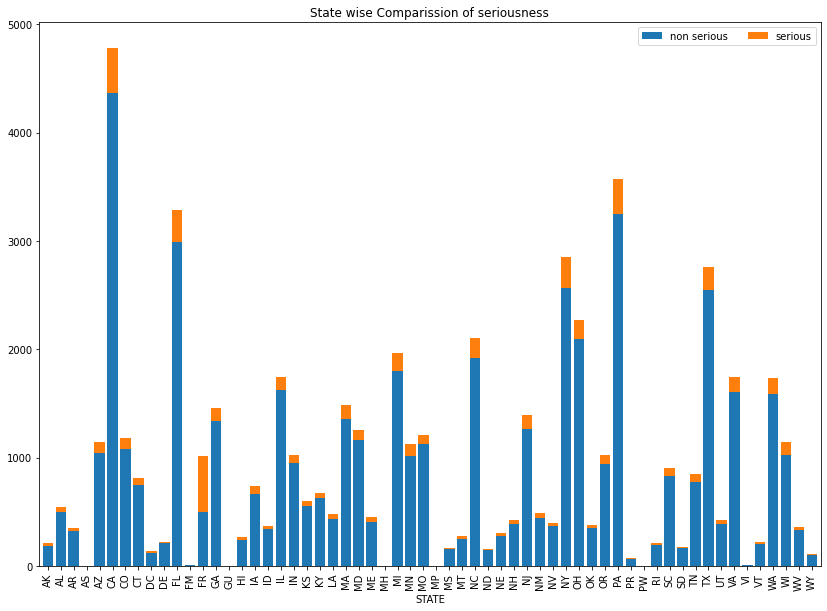

In [ ]:
pd.crosstab(StateAnalysis.STATE,StateAnalysis.serious).plot.bar(stacked=True,width = .8,figsize=(14, 10))
plt.legend(['non serious', 'serious'], loc='upper right', ncol = 3)
plt.title('State wise Comparission of seriousness', loc ='center')
plt.show()

In [ ]:
df_covid_allergies = df.filter(['VAERS_ID','ALLERGIES','serious'], axis=1)
df_covid_allergies.head()

,VAERS_ID,ALLERGIES,serious
0,259589,NaN,0
1,261580,NaN,0
2,261581,NaN,1
3,261665,NaN,1
4,261784,NaN,0


In [ ]:
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].astype(str)

# Remove punctuation
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].str.replace('[^\w\s]','')

# Convert to lower case
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].map(lambda x: x.lower())

# Tokenize
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].map(lambda x: x.split())
df_covid_allergies.head()

,VAERS_ID,ALLERGIES,serious
0,259589,[nan],0
1,261580,[nan],0
2,261581,[nan],1
3,261665,[nan],1
4,261784,[nan],0


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Stop Words
stop_words=set(stopwords.words("english"))
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].map(lambda x: [word for word in x if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].map(lambda x: [stemmer.stem(y) for y in x])
df_covid_allergies.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,VAERS_ID,ALLERGIES,serious
0,259589,[nan],0
1,261580,[nan],0
2,261581,[nan],1
3,261665,[nan],1
4,261784,[nan],0


In [ ]:
df_covid_allergies.shape

(74670, 3)

In [ ]:
# Unpack lists with Pandas

df_covid_allergies = df_covid_allergies.explode('ALLERGIES', ignore_index=True)

df_covid_allergies.head(10)

,VAERS_ID,ALLERGIES,serious
0,259589,nan,0
1,261580,nan,0
2,261581,nan,1
3,261665,nan,1
4,261784,nan,0
5,262241,nan,0
6,262263,nan,0
7,262354,nan,0
8,262456,nan,0
9,262816,nan,0


In [ ]:
# Get the frequency of allergies
df_covid_allergies['ALLERGIES'].value_counts(ascending = False)

nan             40483
none             9854
penicillin       4149
sulfa            3979
allergi          2687
                ...  
propin              1
burpopion           1
laundri             1
paraesthesia        1
pantoloc            1
Name: ALLERGIES, Length: 4839, dtype: int64

In [ ]:
# Only kepp allergies that are in more than 1000 patients
allergies_count = df_covid_allergies.ALLERGIES.value_counts()
df_covid_allergies = df_covid_allergies[df_covid_allergies.ALLERGIES.isin(allergies_count.index[allergies_count.gt(100)])]
df_covid_allergies['ALLERGIES'].value_counts(ascending = False)

nan            40483
none            9854
penicillin      4149
sulfa           3979
allergi         2687
               ...  
lipitor          103
eye              102
iv               101
environment      101
zithromax        101
Name: ALLERGIES, Length: 125, dtype: int64

In [ ]:
# Drop rows with "nan","none","allergi","food","known","unknown","reaction","na","report", "medic"

df_covid_allergies = df_covid_allergies.drop(df_covid_allergies[df_covid_allergies.ALLERGIES.isin(["nan","past","updat","allerg",
                                                                                                   "none","comment","document","drug",
                                                                                                   "vaccin","nka","nkda","allergi","food",
                                                                                                   "known","unknown","reaction","na","report", 
                                                                                                   "medic","n","see","pcn"])].index)
df_covid_allergies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35407 entries, 22496 to 131822
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   VAERS_ID   35407 non-null  int64 
 1   ALLERGIES  35407 non-null  object
 2   serious    35407 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
S_ALLERGIES  = df_covid_allergies[df_covid_allergies['serious']== 1]
wordcloud2 = WordCloud(width=1600, height=800, 
            background_color ='white',min_font_size = 10).generate(' '.join(S_ALLERGIES.ALLERGIES))

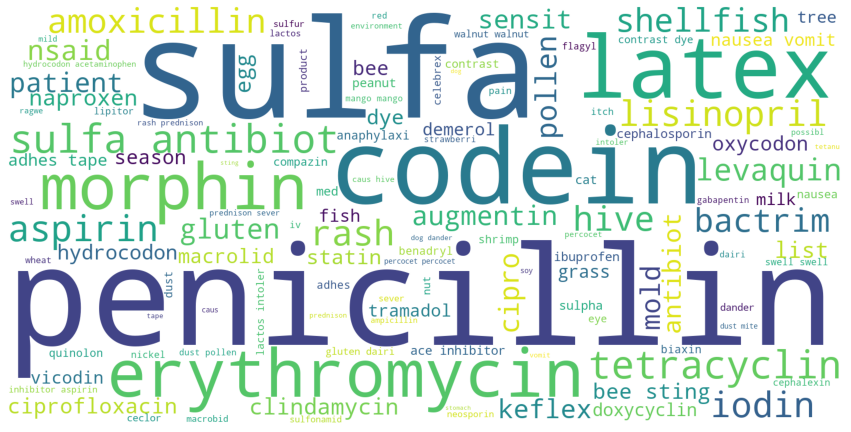

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [ ]:
NS_ALLERGIES  = df_covid_allergies[df_covid_allergies['serious']== 0]
wordcloud3 = WordCloud(width=1600, height=800, 
            background_color ='white',min_font_size = 10).generate(' '.join(NS_ALLERGIES.ALLERGIES))

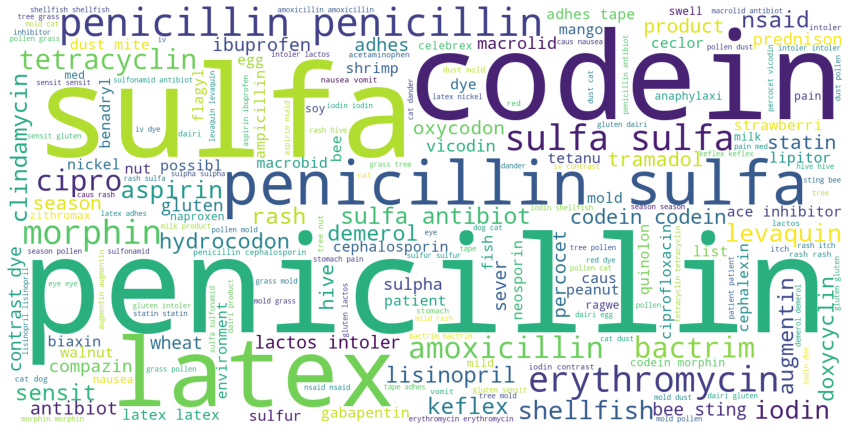

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

In [ ]:
df_ML = df.copy()

In [ ]:
df_ML.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 74670 entries, 0 to 78287
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      74670 non-null  int64  
 1   STATE         70261 non-null  object 
 2   AGE_YRS       74670 non-null  float64
 3   SEX           74670 non-null  int64  
 4   SYMPTOM_TEXT  74670 non-null  object 
 5   DIED          74670 non-null  int64  
 6   DATEDIED      165 non-null    object 
 7   L_THREAT      74670 non-null  int64  
 8   HOSPITAL      74670 non-null  int64  
 9   HOSPDAYS      74670 non-null  float64
 10  X_STAY        74670 non-null  int64  
 11  DISABLE       74670 non-null  int64  
 12  RECOVD        74670 non-null  int64  
 13  VAX_DATE      74670 non-null  object 
 14  ONSET_DATE    74670 non-null  object 
 15  NUMDAYS       74670 non-null  int64  
 16  OTHER_MEDS    51451 non-null  object 
 17  CUR_ILL       48767 non-null  object 
 18  HISTORY       49313 non-nu

In [ ]:
df_knn_ML = df_ML.drop(['STATE','DATEDIED','X_STAY','VAX_DATE','ONSET_DATE','NUMDAYS',
            'ER_ED_VISIT','VAX_TYPE','VAX_NAME','ime'],axis=1)

In [ ]:
df_ML.drop(['VAERS_ID','STATE','DATEDIED','X_STAY','VAX_DATE','ONSET_DATE','NUMDAYS',
            'ER_ED_VISIT','VAX_TYPE','VAX_NAME','ime'
],axis=1,inplace=True)

In [ ]:
df_ML

,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,OTHER_MEDS,...,HISTORY,BIRTH_DEFECT,ALLERGIES,VAX_MANU,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,serious
0,62.0,0,Information has been received from a pharmacis...,0,0,0,0.0,0,1,NONE,...,Medical history Shingles,0,NaN,MERCK & CO. INC.,Glossitis,NaN,NaN,NaN,NaN,0
1,67.0,1,Information has been received from a year old ...,0,0,0,0.0,0,1,HYTRIN testosterone,...,NaN,0,NaN,MERCK & CO. INC.,Myalgia,Pyrexia,NaN,NaN,NaN,0
2,75.0,1,Information has been received from a year old ...,0,0,0,0.0,0,1,PROSCAR SYNTHROID PRAVACHOL BENEMID,...,Medical history Shingles,0,NaN,MERCK & CO. INC.,Influenza like illness,Pulmonary congestion,Pyrexia,NaN,NaN,1
3,71.0,1,Information has been received from a year old ...,0,1,0,0.0,1,0,Zetia,...,Hypercholesterolaemia Joint disorder,0,NaN,MERCK & CO. INC.,Dyspnoea,Heart rate increased,Nervousness,Tachycardia,NaN,1
4,82.0,1,Received Zostavax developed rash along left T ...,0,0,0,0.0,0,1,HCTZ ASA Proscar Lorazepam Fosamax Calcium vit...,...,Spinal Stenosis Osteoporosis Hypertension BPH ...,0,NaN,MERCK & CO. INC.,Rash,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78283,71.0,0,Feeling extremely cold shivering in spite of h...,0,0,0,0.0,0,0,BARICITINIB,...,Medical History Concurrent Conditions Rheumato...,0,NaN,GLAXOSMITHKLINE BIOLOGICALS,Adverse drug reaction,Chills,Feeling cold,Insomnia,NaN,0
78284,74.0,1,Muscular Pain all over body Aching joints incl...,0,0,0,0.0,0,0,ALLOPURINOL ATORVASTATIN LISINOPRIL PREGABALIN,...,NaN,0,NaN,GLAXOSMITHKLINE BIOLOGICALS,Arthralgia,Asthenia,Back pain,Headache,Influenza like illness,0
78285,74.0,1,Muscular Pain all over body Aching joints incl...,0,0,0,0.0,0,0,ALLOPURINOL ATORVASTATIN LISINOPRIL PREGABALIN,...,NaN,0,NaN,GLAXOSMITHKLINE BIOLOGICALS,Insomnia,Lethargy,Myalgia,Nausea,NaN,0
78286,70.0,1,Pain Hot Nausea Sweating Neck gland ache This ...,0,0,0,0.0,0,0,NaN,...,NaN,0,NaN,MERCK & CO. INC.,Adverse drug reaction,Feeling hot,Hyperhidrosis,Ill-defined disorder,Lymph node pain,0


In [ ]:
df_ML.to_csv('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/var_ml.csv', index=False)

In [ ]:
df_knn_ML.to_csv('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/var_knn_ml.csv', index=False)